This notebook contains the code for plotting the results. As we contain results in multiple files, we manually noted down the results from multiple .ipynb files and compiled them here in visual format

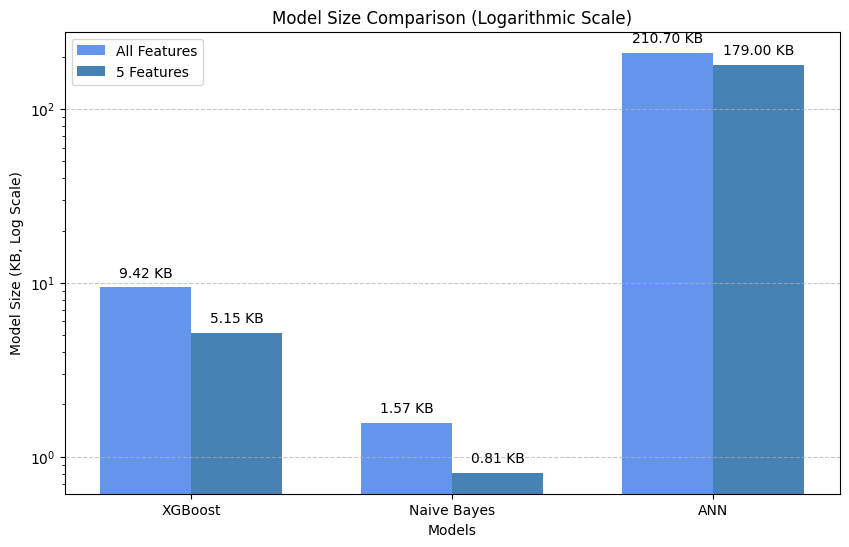

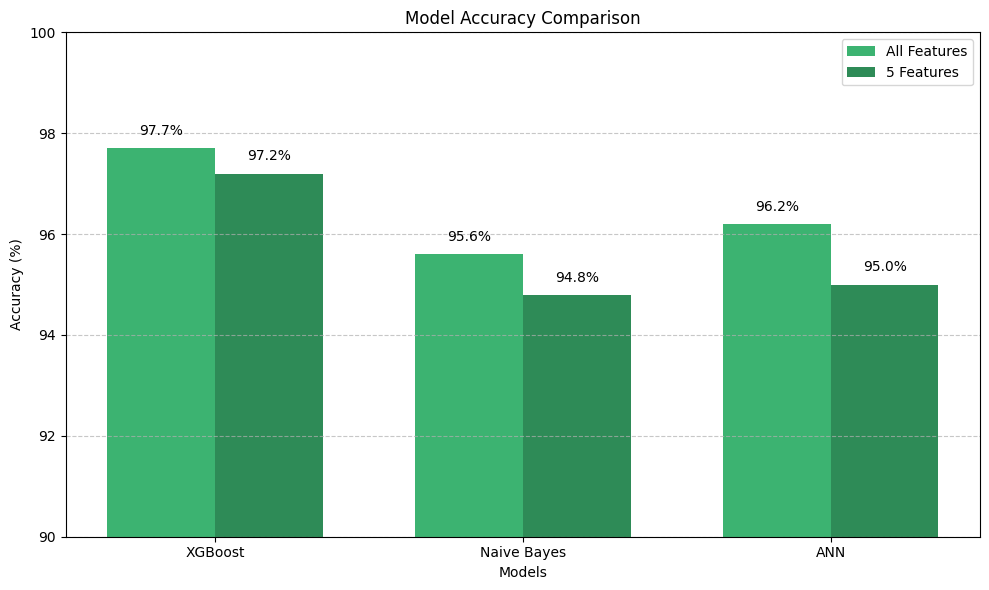

In [2]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'Naive Bayes', 'ANN']
size_all = [9.42, 1.57, 210.7]
size_5 = [5.15, 0.81, 179]
acc_all = [97.7, 95.6, 96.2]
acc_5 = [97.2, 94.8, 95.0]

x = np.arange(len(models))
width = 0.35

fig1, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(x - width/2, size_all, width, label='All Features', color='cornflowerblue')
bar2 = ax1.bar(x + width/2, size_5, width, label='5 Features', color='steelblue')

ax1.set_yscale('log')

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height * 1.1, f'{height:.2f} KB', ha='center', va='bottom', fontsize=10)

ax1.set_xlabel('Models')
ax1.set_ylabel('Model Size (KB, Log Scale)')
ax1.set_title('Model Size Comparison (Logarithmic Scale)')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

fig2, ax2 = plt.subplots(figsize=(10, 6))

bar3 = ax2.bar(x - width/2, acc_all, width, label='All Features', color='mediumseagreen')
bar4 = ax2.bar(x + width/2, acc_5, width, label='5 Features', color='seagreen')

for bars in [bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Model Accuracy Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylim(90, 100)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Show both plots
plt.tight_layout()
plt.show()4

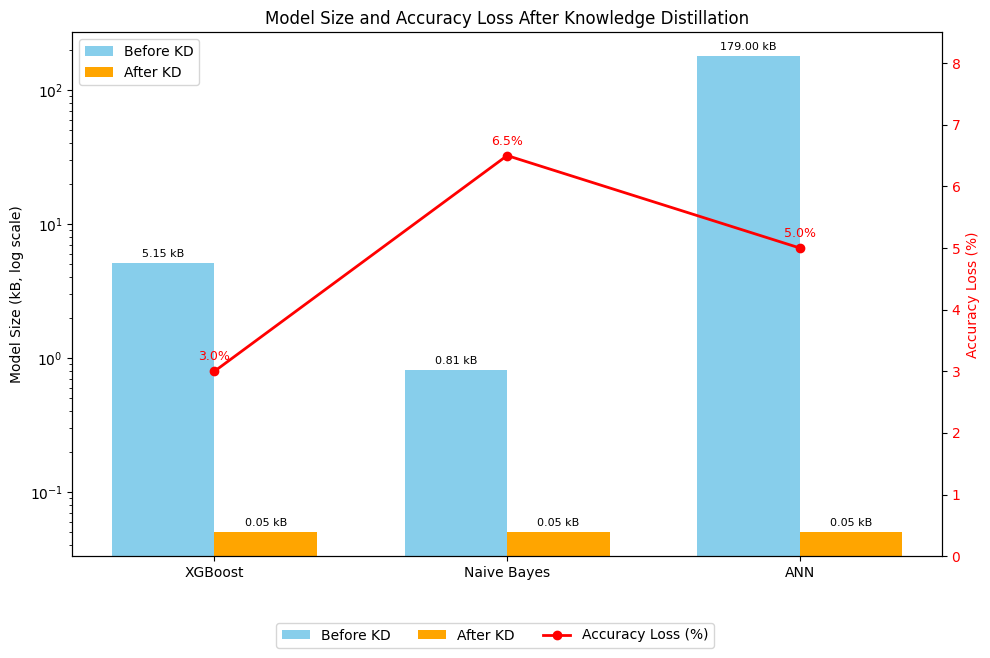

In [3]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'Naive Bayes', 'ANN']

sizes_before = np.array([5.15, 0.81, 179])
sizes_after = np.array([0.05, 0.05, 0.05])

accuracy_loss = [3, 6.5, 5]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, sizes_before, width, label='Before KD', color='skyblue')
bars2 = ax1.bar(x + width/2, sizes_after, width, label='After KD', color='orange')

ax1.set_yscale('log')
ax1.set_ylabel('Model Size (kB, log scale)')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Size and Accuracy Loss After Knowledge Distillation')
ax1.legend(loc='upper left')

for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f} kB',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

ax2 = ax1.twinx()
ax2.plot(x, accuracy_loss, color='red', marker='o', label='Accuracy Loss (%)', linewidth=2)
ax2.set_ylabel('Accuracy Loss (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(accuracy_loss) + 2)

for i, loss in enumerate(accuracy_loss):
    ax2.annotate(f'{loss:.1f}%', (x[i], accuracy_loss[i]), textcoords="offset points",
                 xytext=(0, 8), ha='center', color='red', fontsize=9)

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.show()


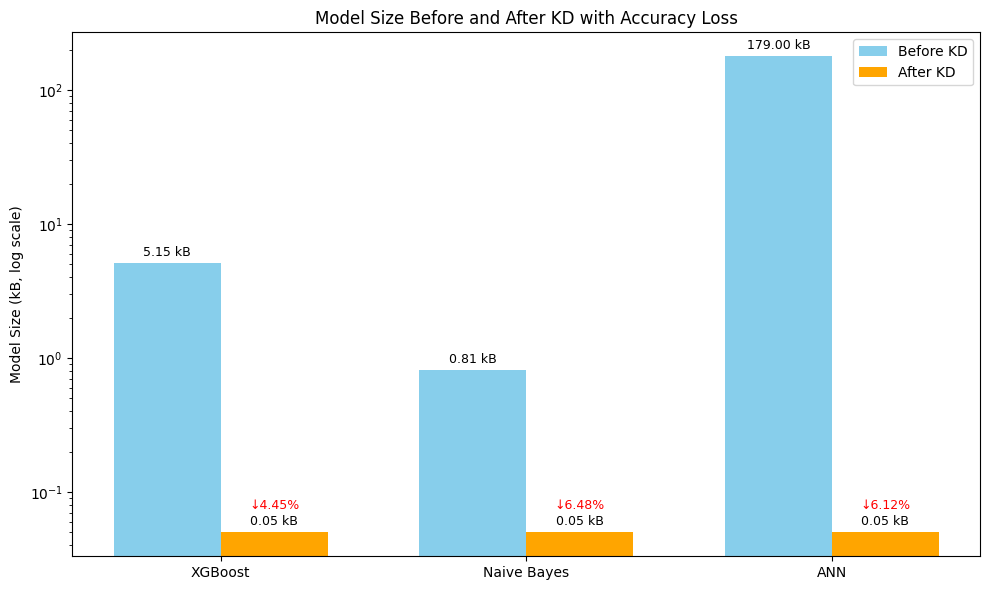

In [13]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'Naive Bayes', 'ANN']
sizes_before = [5.15, 0.81, 179]
sizes_after = [0.05, 0.05, 0.05]
accuracy_loss = [4.45, 6.48, 6.12]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, sizes_before, width, label='Before KD', color='skyblue')
bars2 = ax.bar(x + width/2, sizes_after, width, label='After KD', color='orange')

ax.set_yscale('log')
ax.set_ylabel('Model Size (kB, log scale)')
ax.set_title('Model Size Before and After KD with Accuracy Loss')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f} kB',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    ax.annotate(f'↓{accuracy_loss[i]}%',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 15), textcoords='offset points',
                ha='center', va='bottom', fontsize=9, color='red')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from tabulate import tabulate

data = {
    "Model": [
        "LR", "k-NN", "DT", "RF", "NB", "ANN",
        "XGB (Ours)", "NB (Ours)", "ANN (Ours)"
    ],
    "Cloud (s)": [
        16.54, 8.16, 8.98, 31.75, 0.67, 893.43,
        1.2279, 0.2071, 1324.28
    ],
    "Edge (s)": [
        19.06, 17.61, 17.46, 166.83, 0.69, 1847.94,
        0.8395, 0.1189, 1178.85
    ]
}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by="Edge (s)", ascending=False)

print(tabulate(df_sorted, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════╤═════════════╤════════════╕
│ Model      │   Cloud (s) │   Edge (s) │
╞════════════╪═════════════╪════════════╡
│ ANN        │    893.43   │  1847.94   │
├────────────┼─────────────┼────────────┤
│ ANN (Ours) │   1324.28   │  1178.85   │
├────────────┼─────────────┼────────────┤
│ RF         │     31.75   │   166.83   │
├────────────┼─────────────┼────────────┤
│ LR         │     16.54   │    19.06   │
├────────────┼─────────────┼────────────┤
│ k-NN       │      8.16   │    17.61   │
├────────────┼─────────────┼────────────┤
│ DT         │      8.98   │    17.46   │
├────────────┼─────────────┼────────────┤
│ XGB (Ours) │      1.2279 │     0.8395 │
├────────────┼─────────────┼────────────┤
│ NB         │      0.67   │     0.69   │
├────────────┼─────────────┼────────────┤
│ NB (Ours)  │      0.2071 │     0.1189 │
╘════════════╧═════════════╧════════════╛


In [5]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from tabulate import tabulate

data = {
    "Model": [
        "LR", "k-NN", "DT", "RF", "NB", "ANN",
        "XGB (Ours)", "NB (Ours)", "ANN (Ours)"
    ],
    "Cloud (μs)": [
        0.04, 513.31, 0.07, 0.62, 0.19, 1.28,
        0.019, 0.014, 0.014
    ],
    "Edge (μs)": [
        0.04, 530.14, 0.09, 1.88, 0.34, 2.97,
        0.017, 0.018, 0.017
    ],
    "IoT Device (μs)": [
        0.04, 2078.01, 0.34, 10.10, 2.13, 5.58,
        0.024, 0.02, 0.0245
    ],
    "IoT End Device (μs)": [
        73.06, None, 65.06, 2088, 602, None,
        11.6, 11, 11.21
    ]
}

df = pd.DataFrame(data)
df = df.round(4)

print(tabulate(df, headers="keys", tablefmt="fancy_grid", showindex=False))


╒════════════╤══════════════╤═════════════╤═══════════════════╤═══════════════════════╕
│ Model      │   Cloud (μs) │   Edge (μs) │   IoT Device (μs) │   IoT End Device (μs) │
╞════════════╪══════════════╪═════════════╪═══════════════════╪═══════════════════════╡
│ LR         │        0.04  │       0.04  │            0.04   │                 73.06 │
├────────────┼──────────────┼─────────────┼───────────────────┼───────────────────────┤
│ k-NN       │      513.31  │     530.14  │         2078.01   │                nan    │
├────────────┼──────────────┼─────────────┼───────────────────┼───────────────────────┤
│ DT         │        0.07  │       0.09  │            0.34   │                 65.06 │
├────────────┼──────────────┼─────────────┼───────────────────┼───────────────────────┤
│ RF         │        0.62  │       1.88  │           10.1    │               2088    │
├────────────┼──────────────┼─────────────┼───────────────────┼───────────────────────┤
│ NB         │        0.19  │   

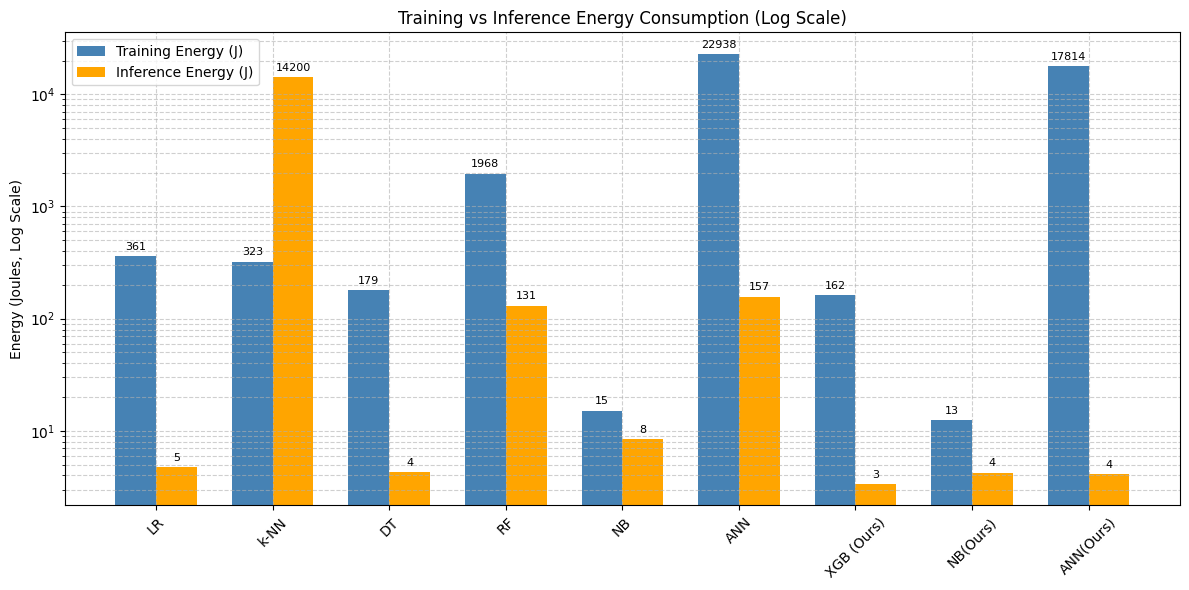

In [2]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LR', 'k-NN', 'DT', 'RF', 'NB', 'ANN', 'XGB (Ours)', 'NB(Ours)', 'ANN(Ours)']
training_joules = [361.07, 322.72, 178.73, 1967.51, 15.16, 22937.68, 162.14, 12.54, 17814]
inference_joules = [4.73, 14200.00, 4.29, 130.81, 8.41, 157.14, 3.36, 4.25, 4.1]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, training_joules, width, label='Training Energy (J)', color='steelblue')
bars2 = ax.bar(x + width/2, inference_joules, width, label='Inference Energy (J)', color='orange')

ax.set_yscale('log')  
ax.set_ylabel('Energy (Joules, Log Scale)')
ax.set_title('Training vs Inference Energy Consumption (Log Scale)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.6)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
